# What match to recommend watching to my dad?

The amazing world cup is going to its finish, so it is time to plan what matches to prefer to spectate in the future. Fortunately, the choice is wide. Top 5 leagues will come back just in few weeks, the eurocups will be online in a bit longer period but also pretty soon. My dad is a huge football fan as well I am, and I decided to make a list of attributes the most interesting match should have, based on what my father is fascinated by during watching sport broadcasts(amount of goals, domination of one team over the opponent or in opposite way the fierce fight until the last breathe, etc.) and the average time the match is about to start, so it can fit the schedule of my busy dad. Here we have the trove of data to deal with, where over 50000 records are made over the last 20 years. So there are the questions we are going to find the answer for:  What match to recommend rewatching to my dad?

Let's examine the wants my dad provided, regarding his dream match:
1. Exactly one of the teams has letter 'U' in its name and it must win
2. The match does not start later than 20:00 
3. Minimum 2 goals are scored
4. Match is played in summer

In addition to this, we will look for tendencies of certain leagues and concrete football clubs meeting these requirements so my dad will know for what matches he should take his time for

Let's form the plan we will follow during analysis:
1. Find out the most interesting match to rewatch from the past(the time condition is irrelevant at this step, thus we can put it down here)
2. Determine the competition, which suits the dad's wishes the most
3. Search the team, which meets the requirements the most

The very first thing we need to do is to validate our data and clean where needed

In [15]:
import pandas as pd
import numpy as np
football_data = pd.read_csv(r"C:\Users\mmatr\OneDrive\Рабочий стол\Football dataset\Full_Kaggle_Dataset.csv")

In [16]:
display(football_data.shape)
football_data.describe()

(51402, 16)

,Home_Score,Away_Score,Home_Score_AET,Away_Score_AET,Home_Penalties,Away_Penalties,Home_Points,Away_Points,season
count,51273.000000,51273.000000,1469.000000,1469.000000,809.000000,809.000000,51273.000000,51273.000000,51402.000000
mean,1.507480,1.190997,1.467665,1.424779,3.824475,3.950556,1.608761,1.163731,2011.906735
std,1.299938,1.189068,1.151268,1.123485,1.823620,1.787616,1.335362,1.296897,5.759252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2002.000000
25%,1.000000,0.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000,2007.000000
50%,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,2012.000000
75%,2.000000,2.000000,2.000000,2.000000,5.000000,5.000000,3.000000,3.000000,2017.000000
max,14.000000,15.000000,8.000000,6.000000,13.000000,14.000000,3.000000,3.000000,2022.000000


In [17]:
football_data.columns
football_data.head()

,Round,Date,Time,Home_Team,Home_Score,Away_Score,Away_Team,Home_Score_AET,Away_Score_AET,Home_Penalties,Away_Penalties,Home_Points,Away_Points,season,Country,Competition
0,ROUND 1,31/08/2002,22:30,RACING SANTANDER,0.0,1.0,VALLADOLID,NaN,NaN,NaN,NaN,0.0,3.0,2002,spain,primera-division
1,ROUND 1,01/09/2002,21:00,RAYO VALLECANO,2.0,2.0,ALAVES,NaN,NaN,NaN,NaN,1.0,1.0,2002,spain,primera-division
2,ROUND 1,01/09/2002,21:00,REAL SOCIEDAD,4.0,2.0,ATHLETIC BILBAO,NaN,NaN,NaN,NaN,3.0,0.0,2002,spain,primera-division
3,ROUND 1,01/09/2002,22:00,MALLORCA,0.0,2.0,VALENCIA,NaN,NaN,NaN,NaN,0.0,3.0,2002,spain,primera-division
4,ROUND 1,01/09/2002,22:30,VILLARREAL,2.0,2.0,OSASUNA,NaN,NaN,NaN,NaN,1.0,1.0,2002,spain,primera-division


O-oh, we see that amount of non-null values in 'Home_Score', 'Away_Score' 'Home_Points' and 'Away_Points' columns don't match the length of the dataframe.
Therefore we are going to remove those rows where it is the case:

In [18]:
football_data = football_data.dropna(subset = ['Home_Score', 'Away_Score','Home_Points','Away_Points'])
football_data.shape

(51273, 16)

Next step we ensure there are no unpleasant surprises in the other columns:

In [19]:
for x in football_data.columns:
    display('football_data['+x+']' + ' - '+str(football_data[x].isna().sum()))

'football_data[Round] - 0'

'football_data[Date] - 0'

'football_data[Time] - 0'

'football_data[Home_Team] - 0'

'football_data[Home_Score] - 0'

'football_data[Away_Score] - 0'

'football_data[Away_Team] - 0'

'football_data[Home_Score_AET] - 49804'

'football_data[Away_Score_AET] - 49804'

'football_data[Home_Penalties] - 50464'

'football_data[Away_Penalties] - 50464'

'football_data[Home_Points] - 0'

'football_data[Away_Points] - 0'

'football_data[season] - 0'

'football_data[Country] - 0'

'football_data[Competition] - 0'

Everything is good, no unexpected information was revealed. The amount of NaN values in the 'Home_Score_AET' and 'Away_Score_AET' columns is so big, because extra times are played in football matches quite rarely(actually never in league competitions). So it is not a mistake but it is rather the exception when those values are not blank. The similar situation with penalty attributes.

With intent to make the data more detailed and insightful, I decided to add details to the 'Competition' attribute, namely to the matches of fa-cups(football association cups) by specifying the country in its name in the column:

In [20]:
country_list = football_data['Country'].unique()
for index, row in football_data.iterrows():
    comp_name = row['Competition']
    country_name = row['Country']
    if comp_name == 'fa-cup':
        comp_name = country_name+'_cup'
    football_data.at[index, 'Competition'] = comp_name

As the final step of this stage we count the amount of matches per competition and country represented in the data, so we are sure the answers will be fair, not biased:

In [21]:
display(football_data['Competition'].value_counts())
football_data['Country'].value_counts()

premier-league           7699
primera-division         7680
ligue-1                  7600
serie-a                  7542
bundesliga               6201
england_cup              3005
uefa-europa-league       2590
uefa-champions-league    2526
france_cup               2178
spain_cup                1783
germany_cup              1243
italy_cup                1226
Name: Competition, dtype: int64

england        10704
france          9778
spain           9463
italy           8768
germany         7444
europe-uefa     5116
Name: Country, dtype: int64

In general, there is no huge skew in any obseravation, but we must pay attention to the fact that there are considerably less matches from Germany and Eurocups(which indeed is OK due to their regulatiry) but not to make massive difference

Perfect, now when only the valid observations are left in the table, the validation and cleaning processes are over. From that moment we can procced to exploratory data analysis:

So, what we are going to begin with is adding some useful columns to derives some important attributes regarding wishes above

Firstly, define the column which indicates whether letter 'u' is contained in the home and away team's name:

In [22]:
football_data['Home_U'] = football_data['Home_Team'].apply(lambda x: 1 if 'u' in x.lower() else 0)
football_data['Away_U'] = football_data['Away_Team'].apply(lambda x: 1 if 'u' in x.lower() else 0)

--------------------------------------------------------------------------------------------------------------------------------


Then, based on the newly appended columns' values, we determine either one of the teams names('home', 'away') include letter 'U' or none or both of them do:

In [23]:
where_U_list = []
for index, row in football_data.iterrows():
    if row['Home_U'] == 1 and row['Away_U'] == 1:
        where_U_list.append('both')
    elif row['Home_U'] == 1 and row['Away_U'] == 0:
        where_U_list.append('home')
    elif row['Home_U'] == 0 and row['Away_U'] == 1:
        where_U_list.append('away')
    else:
        where_U_list.append('none')
football_data.insert(football_data.shape[1], 'where_U', where_U_list)

Still preparing data for querying regarding first condition we must determine the result of the match('home_win', 'draw', 'away_win'). For that we calculate the goal_difference in every observation:

In [24]:
football_data['goals_difference'] = football_data['Home_Score'] - football_data['Away_Score']
football_data['goals_difference_AET'] = football_data['Home_Score_AET'] - football_data['Away_Score_AET']

Subsequently, derive match result:


In [25]:
result_list = []
for index, row in football_data.iterrows():
    if row['goals_difference'] > 0:
        result_list.append('home_win')
    elif row['goals_difference'] < 0:
        result_list.append('away_win')
    else:
        result_list.append('draw')
football_data.insert(football_data.shape[1], 'result', result_list)        

In [26]:
#Due to the plenty of NaN values in this column I wrapped the function body with if-pd.isna-condition 
result_list_AET = []
for index, row in football_data.iterrows():
    if pd.isna(row['goals_difference_AET']) == False:
       if row['goals_difference_AET'] > 0:
          result_list_AET.append('home_win')
       elif row['goals_difference_AET'] == 0:
          result_list_AET.append('draw')
       elif row['goals_difference_AET'] < 0:
          result_list_AET.append('away_win')
    else:
        result_list_AET.append(None)
        
football_data.insert(football_data.shape[1], 'result_AET', result_list_AET) 

We proceed straightly to the third condition. Considering the fact these matches have already been played, their start time(the second condition) and the year season(the fourth one) are irrelevant. So minimum amount of 2 goals was scored is the next subject to work with. 

For calculating this property we need to extract the number of all goals scored, two teams combined(cup matches with extra times are included as well):

In [27]:
football_data['total_goals'] = football_data['Home_Score']+football_data['Away_Score']
football_data['total_goals_AET'] = football_data['Home_Score_AET']+football_data['Away_Score_AET']

Great, finally when some preparation work is done, we advance to the most captivating part - searching the most attractive match, regarding dad's requests. For that we sieve our matches, based on 'u' condition:

In [28]:
only_U = football_data.loc[(football_data['where_U'] == 'away') | (football_data['where_U'] == 'home')]

In [29]:
only_U_home_w = only_U[(only_U['where_U'] == 'home') & (only_U['result']=='home_win')]
only_U_away_w = only_U[(only_U['where_U'] == 'away') & (only_U['result']=='away_win')]
only_U_winners = pd.concat([only_U_home_w, only_U_away_w])

Now extract the matches, where at least 2 goals were scored:

In [30]:
only_U_winners_2_goals = only_U_winners[(only_U_winners['total_goals'] >=2) | (only_U_winners['total_goals_AET'] >=2)]
only_U_winners_2_goals.shape


(4854, 25)

As we can see there is a plenty of matches to choose from, but we want my dad to have as much fun while watching the game as possible, so we will pinpoint the matches with the most amount of goals scored in every competition represented in the dataset: 

In [31]:
competition_list = list(only_U_winners_2_goals['Competition'].unique())
for x in competition_list:
    U_winners_per_comp = only_U_winners_2_goals[only_U_winners_2_goals['Competition'] == x]
    most_goals = U_winners_per_comp.loc[U_winners_per_comp['total_goals'] == U_winners_per_comp['total_goals'].max()]
    display(most_goals[['Round', 'Date', 'Time', 'Home_Team', 'Home_Score', 'Away_Score', 'Away_Team', 'Competition']])

,Round,Date,Time,Home_Team,Home_Score,Away_Score,Away_Team,Competition
2537,ROUND 26,08/03/2009,18:00,DEPORTIVO LA CORUNA,5.0,3.0,RACING SANTANDER,primera-division


,Round,Date,Time,Home_Team,Home_Score,Away_Score,Away_Team,Competition
9650,ROUND 8,29/09/2007,17:00,PORTSMOUTH,7.0,4.0,READING,premier-league


,Round,Date,Time,Home_Team,Home_Score,Away_Score,Away_Team,Competition
16396,ROUND 10,22/10/2005,16:30,EINTRACHT FRANKFURT,6.0,3.0,FC KOLN,bundesliga
17125,ROUND 23,08/03/2008,16:30,VfB STUTTGART,6.0,3.0,WERDER BREMEN,bundesliga
15677,ROUND 32,10/05/2003,17:30,HERTHA BERLIN,3.0,6.0,BAYERN MUNICH,bundesliga
19967,ROUND 33,13/05/2017,16:30,RB LEIPZIG,4.0,5.0,BAYERN MUNICH,bundesliga


,Round,Date,Time,Home_Team,Home_Score,Away_Score,Away_Team,Competition
25237,ROUND 23,12/02/2012,16:00,LILLE,4.0,5.0,BORDEAUX,ligue-1


,Round,Date,Time,Home_Team,Home_Score,Away_Score,Away_Team,Competition
30248,ROUND 35,08/05/2005,16:00,LIVORNO,3.0,6.0,ROBUR SIENA,serie-a


,Round,Date,Time,Home_Team,Home_Score,Away_Score,Away_Team,Competition
38688,group-stage,22/11/2016,21:45,BORUSSIA DORTMUND,8.0,4.0,LEGIA WARSZAWA,uefa-champions-league


,Round,Date,Time,Home_Team,Home_Score,Away_Score,Away_Team,Competition
41620,group-stage,22/10/2020,19:55,BAYER LEVERKUSEN,6.0,2.0,NICE,uefa-europa-league
41812,semi-finals,29/04/2021,22:00,MANCHESTER UTD,6.0,2.0,ROMA,uefa-europa-league


,Round,Date,Time,Home_Team,Home_Score,Away_Score,Away_Team,Competition
43565,second-round,05/01/2021,18:00,UD IBIZA,5.0,2.0,CELTA VIGO,spain_cup
41960,round-32,05/11/2002,22:30,RACING DE FERROL,3.0,4.0,DEPORTIVO LA CORUNA,spain_cup
42274,second-round,05/09/2007,22:00,SAN ISIDRO,2.0,5.0,PORTUENSE,spain_cup


,Round,Date,Time,Home_Team,Home_Score,Away_Score,Away_Team,Competition
43929,first-round,09/11/2003,17:00,NOTTS COUNTY,7.0,2.0,SHILDON,england_cup
45908,first-round,05/11/2016,17:00,DARTFORD,3.0,6.0,SUTTON UTD,england_cup


,Round,Date,Time,Home_Team,Home_Score,Away_Score,Away_Team,Competition
46890,first-round,21/08/2004,16:00,FC SCHONBERG 95,0.0,15.0,FC KAISERSLAUTERN,germany_cup


,Round,Date,Time,Home_Team,Home_Score,Away_Score,Away_Team,Competition
50076,EIGHTH ROUND,27/11/2021,16:00,CHAMBERY,4.0,6.0,AUXERRE,france_cup


,Round,Date,Time,Home_Team,Home_Score,Away_Score,Away_Team,Competition
50269,third-round,20/11/2004,16:00,LECCE,4.0,5.0,UDINESE,italy_cup


Thus, we obtain the bunch of matches, which meet father's expectations, therefore he has something to opt from

But we are not done yet, now we go to the second step of the plan - finding out the most suitable competition to follow in the future.

For this purpose we need to manipulate the dataset a bit and extract some useful information about represented competitions, according to wishes, such a season of matchs was played. In our case whether it was summer or not:

In [32]:
football_data['Date'] = pd.to_datetime(football_data['Date'], infer_datetime_format=True)

In [33]:
months = football_data['Date'].dt.month
months_list = months.to_list()
summer_season = []
for x in months_list:
    if x == 6 or x == 7 or x == 8:
        summer_season.append('yes')
    else:
        summer_season.append('no')
football_data.insert(football_data.shape[1], 'summer', summer_season)

Now let's separate matches according to the season of the matchday:

In [34]:
summer_foot = football_data.loc[football_data['summer'] == 'yes']

Further proceeding to the next condition leave out only the games where at least 2 goals were scored:

In [35]:
summer_foot_min_2 = summer_foot.loc[(summer_foot['total_goals']>= 2) | (summer_foot['total_goals_AET']>= 2)]


Then we sieve the data, so only the matches started not later than 8 p.m. left over:

In [47]:
#figuring out all unique time values represented
summer_foot['Time'].unique()

array(['22:30', '20:00', '21:00', '21:30', '22:00', '23:00', '23:15',
       '22:45', '23:30', '20:30', '18:00', '19:00', '13:00', '17:00',
       '00:00', '19:30', '21:45', '19:15', '21:15', '15:00', '18:30',
       '19:05', '15:15', '15:30', '14:45', '16:00', '18:05', '18:10',
       '14:00', '17:15', '14:15', '14:50', '15:35', '14:05', '14:30',
       '22:15', '18:15', '16:15', '17:30', '20:45', '22:40', '22:35',
       '16:30', '21:35', '16:40', '21:40', '16:35', '22:50', '19:55',
       '19:45', '21:25', '22:10', '18:45', '22:05', '20:05'], dtype=object)

In [37]:
#filter from opposite of required condition, because there are even more instances 
#of desirable beginning time, so the forming of the list for slicing would be more cumbersome process

#slicing itself
unneeded_starttime = ['21:00', '21:30', '23:00', '23:15', '22:00', '22:30',
       '22:45', '23:30', '20:30','00:00','21:45','21:15','22:15','20:45','22:40','21:35','21:40','22:50','21:25', '22:35', '22:05',
       '20:05']
summer_foot_2_before8 = summer_foot_min_2[~summer_foot_min_2['Time'].isin(unneeded_starttime)]

Eventually, considering the fourth want - team with letter 'u' beat the opponent, who doesn't have it in its name, we make the final slicing:

In [38]:
#all matches are considered, including both with extra times and without
desired_hm = summer_foot_2_before8[(summer_foot_2_before8['where_U'] == 'home') & (summer_foot_2_before8['result']=='home_win')]
desired_aw = summer_foot_2_before8[(summer_foot_2_before8['where_U'] == 'away') & (summer_foot_2_before8['result']=='away_win')]
desired_hm_AET = summer_foot_2_before8[(summer_foot_2_before8['where_U'] == 'home') & (summer_foot_2_before8['result_AET']=='home_win')]
desired_aw_AET = summer_foot_2_before8[(summer_foot_2_before8['where_U'] == 'away') & (summer_foot_2_before8['result_AET']=='away_win')]
desired_matches = pd.concat([desired_hm, desired_aw, desired_hm_AET, desired_aw_AET], axis = 0)

Let's find out what competition is the richest on dad's dream matches:

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

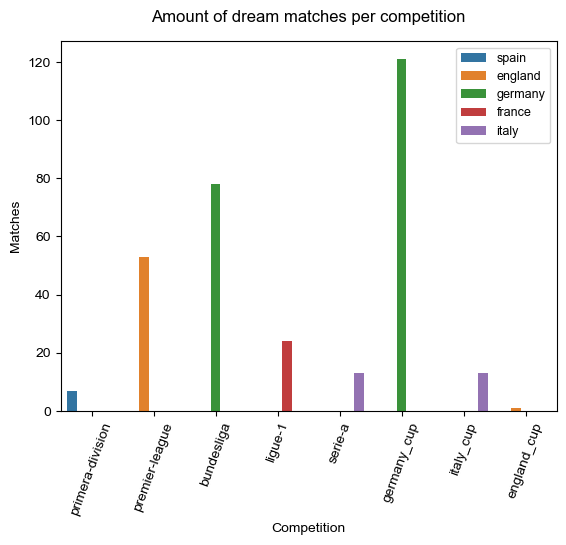

In [40]:
g = sns.countplot(x='Competition', data=desired_matches, hue = 'Country')
plt.xticks(rotation=70)
#fig.set_size_inches(3, 2)
#sns.set(rc={'figure.figsize':(8,3)})
plt.legend(fontsize = 9)
sns.set_style('darkgrid')
g.set_title('Amount of dream matches per competition', y=1.03)
g.set(ylabel = 'Matches')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------
As we can see, the german tournaments, especially deutsch fa-cup, seem the most attractive to watch in the future.
The third place is grabbed by english premier-league with the amount of 53 matches, whereas Spain is the place not to visit for my dad, at least, considering football tourism. 

The time to answer the last question has come. 

What is the best team to support for my father? To find out that, the next steps will be taken:

In [41]:
#extracting all different football clubs in the dataframe
all_teams = list(desired_matches['Home_Team'].unique()) + list(desired_matches['Away_Team'].unique())
all_uniq_teams = list(set(all_teams))

In [42]:
#Calculate the amount of matches every team participated in
FC_dict = {}
for x in all_uniq_teams:
    i=0
    for index, row in desired_matches.iterrows():
        if row['Home_Team'] == x or row['Away_Team'] == x:
            i += 1
    FC_dict[x] = i

For better representation turn it into the dataframe format and get top 10 teams to follow in the next year:

In [43]:
Teams_ser = pd.Series(FC_dict)
team_df = pd.DataFrame({'Name':Teams_ser.index, 'Number of occurences':Teams_ser.values})
team_df_sorted = team_df.sort_values('Number of occurences', ascending = False).reset_index(drop=True)
top_10_teams = team_df_sorted.head(10)
display(top_10_teams)



,Name,Number of occurences
0,MANCHESTER UTD,19
1,BAYERN MUNICH,18
2,BAYER LEVERKUSEN,16
3,VfL WOLFSBURG,16
4,BORUSSIA DORTMUND,13
5,HERTHA BERLIN,13
6,WERDER BREMEN,13
7,BORUSSIA MONCHENGLADBACH,13
8,VfB STUTTGART,12
9,EINTRACHT FRANKFURT,11


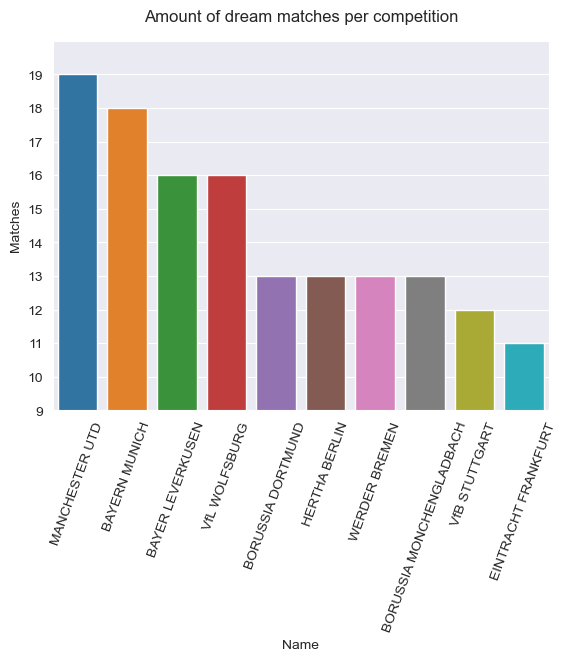

In [46]:
#Additionally create plot for the best comprehension:
g1 = sns.barplot(x='Name', y='Number of occurences', data=top_10_teams)
plt.xticks(rotation=70)
#fig.set_size_inches(3, 2)
#sns.set(rc={'figure.figsize':(8,3)})
sns.set_style('darkgrid')
g1.set_title('Amount of dream matches per competition', y=1.03)
g1.set(ylabel = 'Matches')
plt.yticks(np.arange(min(top_10_teams['Number of occurences'])-2, max(top_10_teams['Number of occurences']+1), step = 1))
plt.ylim(min(top_10_teams['Number of occurences'])-2, max(top_10_teams['Number of occurences'])+1)
plt.show()

# Bottom Line

1. We have got the big list of matches from the past to pick up to watch when there is nothing interesting live
2. Germany is on the top, both national cup and league are super attractive. Then there is English premier league, which situates in the middle, having the gap both between german tournaments and other ones.  
3. Germany clubs are, unsurprisingly, the best options. Still Manchester United stand out from all other English clubs, being represented in the table of the best matches the most amount of times out of all teams 